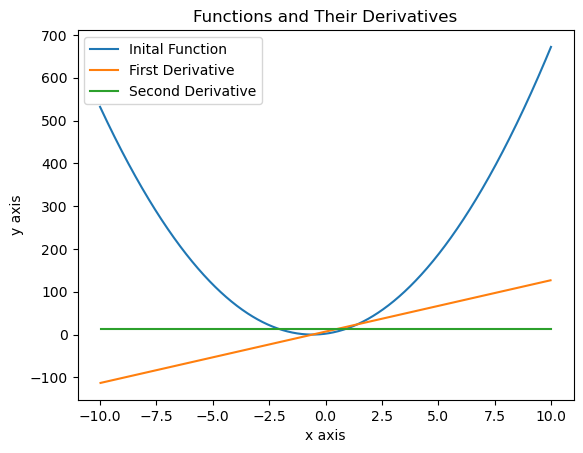

In [7]:
"""I want to run a slightly more mathamatical expirement, to develope the derivative tools I have already a little bit more. I will also attempt to use
seaborn for graphing rather than my typical matplotlib. Note I'll only be working in 1D in order to make the code simpiler."""

#we need a few packages to run our math and illistrate our results each
import numpy as np
import seaborn as sns #rather than plt
import matplotlib.pyplot as plt

class Calculus:
    """We define this class to hold all of our functions nessassary to taking derrivatives."""
    def First_Order_Backwards_Derrivative (V, dx):
        """Takes in an array and the sepration of each element, then calculates the backwards derrivative with the defintion
        V = V - V-1 / dx
        input: array like, float
        returns: array like"""
        V_new = np.zeros(np.shape(V[1:-1]))
        V_shift = np.roll (V,1)
        V_new = (V[1:-1] - V_shift[1:-1]) / dx
        return V_new #cheaked and works at least two sig figs
    
    def Second_Order_Derrivative (V,dx):
        """Takes in an array and the sepration of each element, then calculates the second order  derrivative with the defintion
        V = V+1 + V-1 - 2V / dx**2
        input: array like, float
        returns: array like"""
        V_new = np.zeros(np.shape(V[1:-1]))
        V_shift_left = np.roll (V,-1)
        V_shift_right = np.roll (V,1)
        V_new = (V_shift_left[1:-1] + V_shift_right[1:-1] - 2* V[1:-1]) / (dx**2)
        return V_new

#Now that we have developed the math we need we can prepare some test data

def func (x:float)->float:
    """This is a test function by the function y = 6x^2 + 7x + 2
    Input: float
    Returns: float"""
    return (6 * x**2) +  (7 * x) + 2

N = 20 #number of units of distance we want to look at
Pop = 1_000 #number of data points we need
dx = N / Pop #defines the infentessimal gap between indexies of the dataset

x_data = np.linspace (-N/2,N/2,Pop) #this creates some data from 10 to -10 with 1_000
y_data = func(x_data) #defines our y data for the given function

#we can now start taking our derivatives
First_Der = Calculus.First_Order_Backwards_Derrivative (y_data,dx)
Second_Der = Calculus.Second_Order_Derrivative (y_data,dx)

# plt.scatter (x = x_data, y = y_data, label = "Inital Function")
# plt.scatter (x = x_data[1:-1], y = First_Der, label = "First Derivative")
# plt.scatter (x = x_data[1:-1], y = Second_Der, label = "Second Derivative")
# plt.legend ()
# plt.show ()

sns.lineplot (x = x_data, y = y_data, label = "Inital Function")
sns.lineplot (x = x_data[1:-1], y = First_Der, label = "First Derivative")
sns.lineplot (x = x_data[1:-1], y = Second_Der, label = "Second Derivative")
plt.xlabel ("x axis")
plt.ylabel ("y axis")
plt.title ("Functions and Their Derivatives")
plt.show () #you can mix and match the two

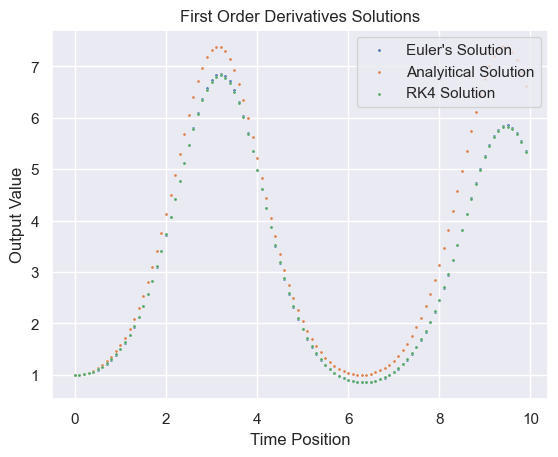

In [9]:
"""We also wish to expirement with solving first order ODEs numerically. We can start with Euler's method then move to more complex forms of the 
The Runge–Kutta method which will give more accurate results. We can define our inital problem as dy/dt = y*sin(t) such that y(0) = 1."""

import numpy as np #reimports needed libaries so we don't need to run the above
import seaborn as sns #rather than plt
import matplotlib.pyplot as plt
import pandas as pd #sns runs off pandas data structures

#spacificly, t0 = 0, y (t0) = 1
t0 = 0
y0 = 1 #plugs in our inital conditions
h = 0.1 #defines our inital step length

n_values = np.arange (0,100,1) #creats a list of values from -100 to 100
Tn_values = t0 + h * n_values #creates a list of values from -10 to 10 this would act as our x-axis

def forcing_term (t:float,y:float) -> float:
    """This outputs the value of our inhomogenarity of the ODE at any given point given by the function f(t,y) = y * sin (t). Requires numpy be import as 
    np before hand.
    Input:
    t: float
    y: float
    Returns: float"""
    return y * np.sin (t)

Results_list = np.zeros (shape = np.shape (n_values)) #this sheet will be needed to save our reuslts, we need to iterate through to use Euler's formula

Results_list[0] += y0 #selects the central value and appends our inital value

for n in range (len (n_values) - 1): #we loop through all other values other than the inital condition
    Results_list[n + 1] += Results_list[n] + h * forcing_term (Tn_values[n],Results_list[n]) #and use the given formula to calculate the next value



#the analitical soluation for this ODE is y(t) = e^-(cos(t) + 1),we can chart this results and compare to our numerical results

def Analyitic_Solution (t:float) ->float:
    """This function is the analyitic soluation to the function dy/dt = y sin(t) with the inital condition y(0) = 1, that is, y (t) = e^-(cos(t) + 1).
    Import numpy before hand as np.

    Input: float
    Return: float"""
    return np.exp (-np.cos(t) + 1)

Analytical_Data = Analyitic_Solution (Tn_values) #we then calculate using the analytical function



"""In adition to analytically finding the solution (which is not always possible) and using Euler's method we can take other methods of the Runge–Kutta
methods, of which Euler's is a type. Spacificlly, we can take the fourth kind of method which will be more accurate than the Euler method, aka RK4."""

RK4_Results = np.zeros (shape = np.shape (n_values)) #this grid will hold our results for the RK4 alrgorithum
RK4_Results[0] += y0 #imports our inital value

for n in range (len (n_values) - 1):#we loop through all other values other than the inital condition
    k1 = forcing_term (Tn_values[n],Results_list[n]) #defines k1,k2, k3, k4 according to the KR4 method
    k2 = forcing_term (Tn_values[n] + h/2,Results_list[n] + h * k1/2)
    k3 = forcing_term (Tn_values[n] + h/2,Results_list[n] + h * k2/2)
    k4 = forcing_term (Tn_values[n] + h,Results_list[n] + h * k3)
    RK4_Results[n + 1] += Results_list[n] #saves the results of the KR4 method
    RK4_Results[n + 1] += (h / 6) * k1
    RK4_Results[n + 1] += (h / 3) * k2
    RK4_Results[n + 1] += (h / 3) * k3
    RK4_Results[n + 1] += (h / 6) * k4


Whole_Data = pd.DataFrame ({'T_data': Tn_values, 'Euler': Results_list, 'Analytical': Analytical_Data, 'RK4': RK4_Results}) #since we want to 
#work in sns rather than plt

#now we can plot our results
sns.set_theme() #sets the theme as defult
sns.scatterplot (data = Whole_Data, x = "T_data", y = "Euler", label = "Euler's Solution", alpha = 1, s= 5) #I think Hue is the same think as colour map
sns.scatterplot (data = Whole_Data, x = "T_data", y = "Analytical",label = "Analyitical Solution", alpha = 1, s = 5) #we plot our results
sns.scatterplot (data = Whole_Data, x = "T_data", y = "RK4",label = "RK4 Solution", alpha = 1, s = 5)
plt.xlabel ("Time Position") #we use plt to label our results
plt.ylabel ("Output Value")
plt.title ("First Order Derivatives Solutions")
plt.legend ()
plt.show ()